<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Calibri; font-size:1.3em;">You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

<B/> <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Import all Liabraries

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Read the Database

In [3]:
df=pd.read_csv("cubic_zirconia.csv")

In [4]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Drop the First column"Unamed:0"

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Shape of the Dataset

In [7]:
df.shape

(26967, 10)

<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Type of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


<I/><B/> <span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Null Values

In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

<I/><span style="font-family:Calibri; font-size:1.3em;"><font color="Blue"/>The depth of the gems where having null values oin the dataset. 697 rows were not having any values, these rows will be replaced with the mean of the dataset.

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Fill the NA values with Mean of the dataset

In [10]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Type of data

In [11]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>EDA of dataset

In [12]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Unique values for categorical variables

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Coverting the Categorical to Dummy Variables

In [14]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [15]:
df.head(2)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
df.shape

(26967, 24)

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Type of data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 24 columns):
carat            26967 non-null float64
depth            26967 non-null float64
table            26967 non-null float64
x                26967 non-null float64
y                26967 non-null float64
z                26967 non-null float64
price            26967 non-null int64
cut_Good         26967 non-null uint8
cut_Ideal        26967 non-null uint8
cut_Premium      26967 non-null uint8
cut_Very Good    26967 non-null uint8
color_E          26967 non-null uint8
color_F          26967 non-null uint8
color_G          26967 non-null uint8
color_H          26967 non-null uint8
color_I          26967 non-null uint8
color_J          26967 non-null uint8
clarity_IF       26967 non-null uint8
clarity_SI1      26967 non-null uint8
clarity_SI2      26967 non-null uint8
clarity_VS1      26967 non-null uint8
clarity_VS2      26967 non-null uint8
clarity_VVS1     26967 non-null uint8
clari

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Inputting the Null Values

In [18]:
df.isnull().sum()

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [53]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.200,0.40,0.70,1.05,2.025
depth,26933.0,61.749043,1.218503,59.000,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.500,56.00,57.00,59.00,63.500
x,26933.0,5.729323,1.126175,1.950,4.71,5.69,6.55,9.310
y,26933.0,5.731255,1.118155,1.965,4.71,5.70,6.54,9.285
z,26933.0,3.536928,0.696753,1.190,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.000,945.00,2375.00,5356.00,11972.500
cut_Good,26933.0,0.090410,0.286773,0.000,0.00,0.00,0.00,1.000
cut_Ideal,26933.0,0.401181,0.490147,0.000,0.00,0.00,1.00,1.000
cut_Premium,26933.0,0.255671,0.436246,0.000,0.00,0.00,1.00,1.000


<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Checking for Duplicates

In [20]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [21]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 24)
After (26933, 24)


In [22]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Univariate and Multivariate Ananlysis

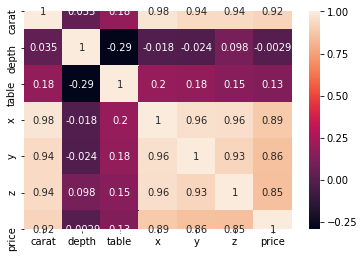

In [23]:
sns.heatmap(df.iloc[:, 0:7].corr(),annot=True)
plt.show()

<I/><span style="font-family:Calibri; font-size:1.3em;"><font color="Blue"/>Length, Width and Height of the diamond are highly correlated.The carat weight of the diamond is highly correlated with length, width and height of the diamond.The depth of the diamonds are negatively correlated. The price is also positively correlated with the carat, length, width and height of the diamond

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Check for Outliers

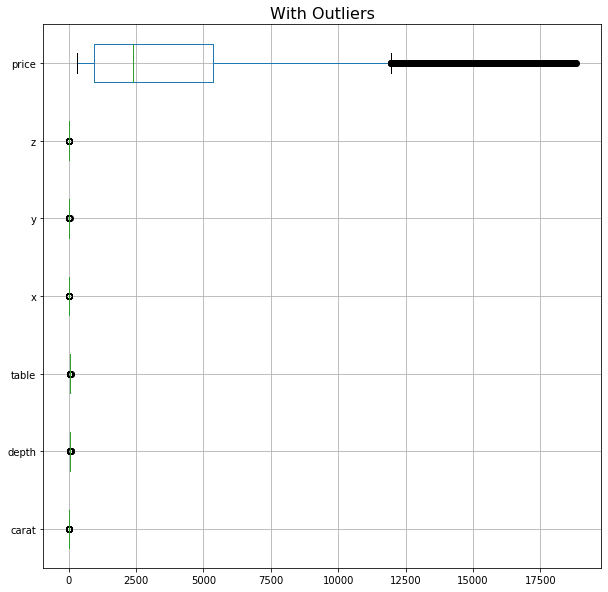

In [24]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Treatment for Outliers

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

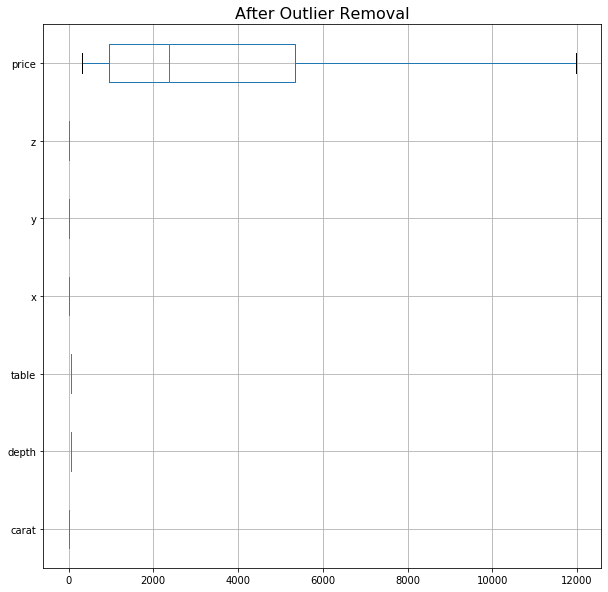

In [27]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Data Distribution

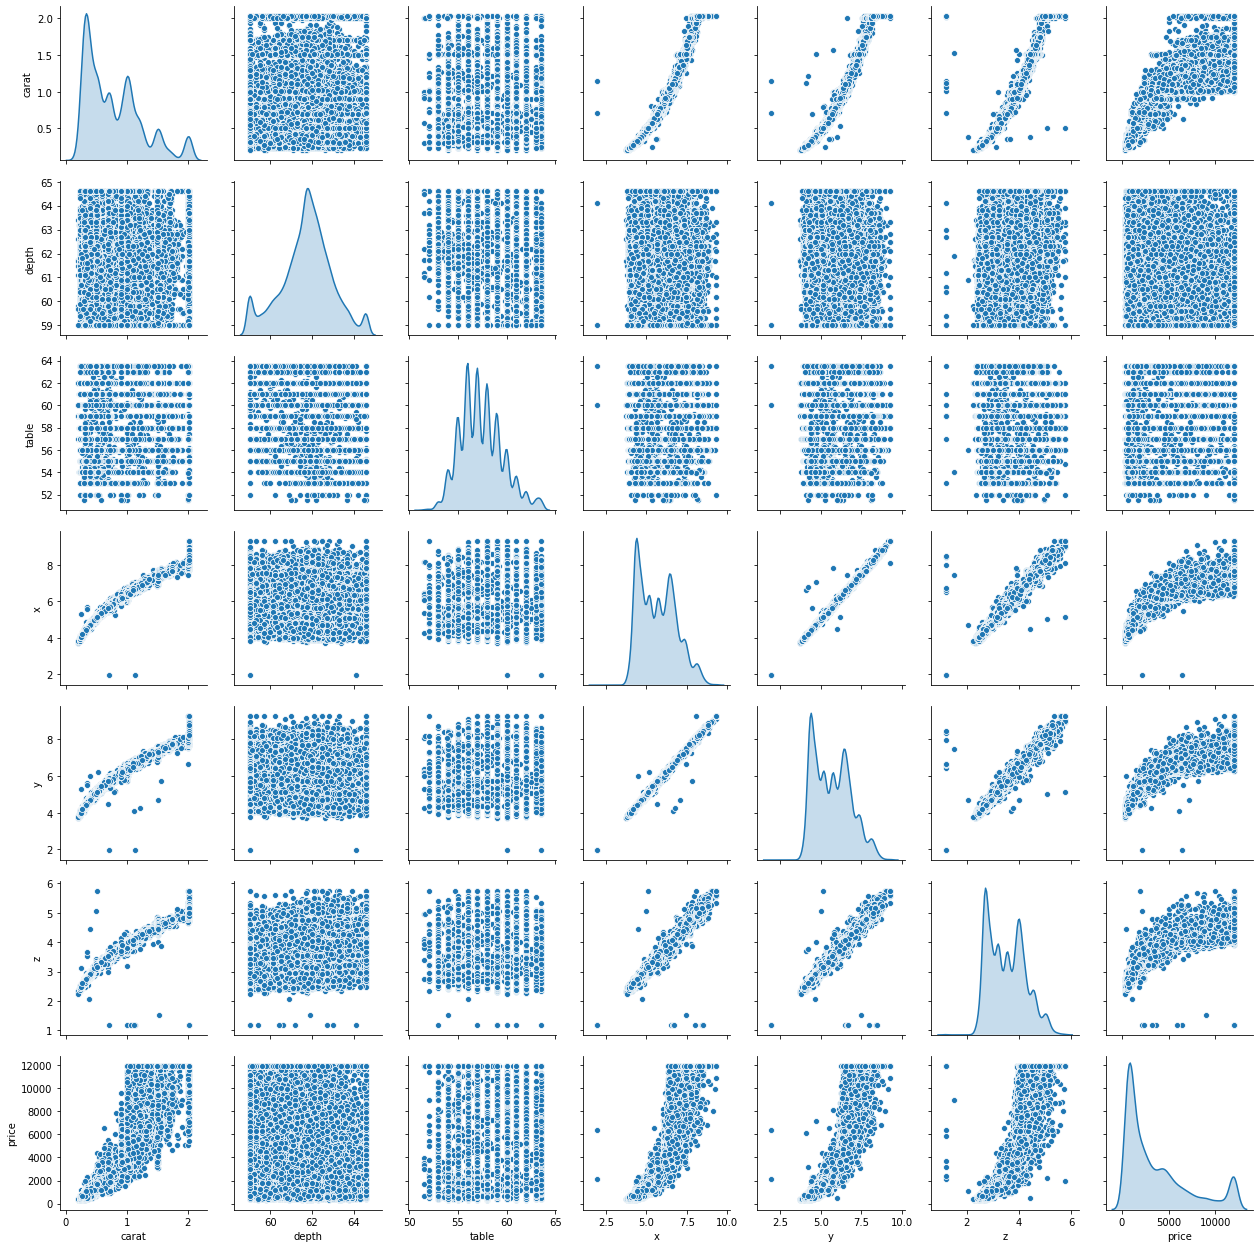

In [28]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

<B/> <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Train - Test Split

In [29]:
X = df.drop('price', axis=1)#copy all predictor in X Dataframe
Y = df[['price']]# Target in Y dataframe

In [30]:
X.head(3)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
Y.head(3)

,price
0,499.0
1,984.0
2,6289.0


<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Train - Test Split with 70:30

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Linear Regression

In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9126.93571059195
The coefficient for depth is -15.014396489796695
The coefficient for table is -18.585758559241
The coefficient for x is -1190.2766851747635
The coefficient for y is 837.3564745735196
The coefficient for z is -163.63843722667417
The coefficient for cut_Good is 481.8131839939364
The coefficient for cut_Ideal is 714.646127014467
The coefficient for cut_Premium is 674.7717434404591
The coefficient for cut_Very Good is 606.8965827395969
The coefficient for color_E is -181.90972759472314
The coefficient for color_F is -256.81260630027936
The coefficient for color_G is -429.3811110593348
The coefficient for color_H is -855.9905503632012
The coefficient for color_I is -1323.9291307344315
The coefficient for color_J is -1928.0517124934531
The coefficient for clarity_IF is 4004.0105702429055
The coefficient for clarity_SI1 is 2519.9221438718046
The coefficient for clarity_SI2 is 1684.4607103791645
The coefficient for clarity_VS1 is 3342.5738468842774

In [35]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1846.1195153134768


<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>R-Square on Train and Test

In [36]:
regression_model.score(X_train, y_train)

0.9402045565696221

In [37]:
regression_model.score(X_test, y_test)

0.9419074462493612

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>RMSE on Train - Test

In [38]:
from sklearn import metrics

In [39]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

847.4553059754451

In [40]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

837.3145344145406

<I/><B/><span style="font-family:Calibri; font-size:1.3em;"><font color="Green"/>Linear Regression on Stats Model

In [41]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,0,0,0,1,...,0,0,0,0,0,0,1,0,0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0,1,0,0,...,0,0,0,0,0,0,1,0,0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4057.0


In [42]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, 
                      inplace = True)

In [43]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [44]:
expr= 'price ~ carat + depth + table+x +y + z + cut_Good + cut_Ideal  + cut_Premium + cut_Very_Good + color_E + color_F+ color_G+color_H+color_I+ color_J+ clarity_IF+ clarity_SI1+ clarity_SI2+ clarity_VS1+ clarity_VS2+clarity_VVS1+clarity_VVS2'

In [45]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -1846.119515
carat            9126.935711
depth             -15.014396
table             -18.585759
x               -1190.276685
y                 837.356475
z                -163.638437
cut_Good          481.813184
cut_Ideal         714.646127
cut_Premium       674.771743
cut_Very_Good     606.896583
color_E          -181.909728
color_F          -256.812606
color_G          -429.381111
color_H          -855.990550
color_I         -1323.929131
color_J         -1928.051712
clarity_IF       4004.010570
clarity_SI1      2519.922144
clarity_SI2      1684.460710
clarity_VS1      3342.573847
clarity_VS2      3039.931687
clarity_VVS1     3772.297788
clarity_VVS2     3757.778854
dtype: float64

In [46]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:40:36   Log-Likelihood:            -1.5386e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.080e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1846.1195    661.115     -2.792

In [47]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [48]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

847.4553059754462

In [49]:
np.sqrt(lm1.mse_resid) #another way

847.9952297717474

In [50]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

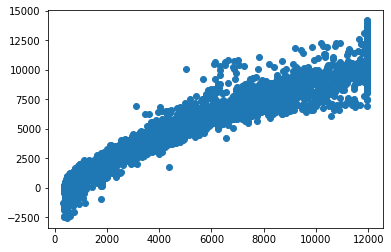

In [51]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [52]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1846.12) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (481.81) * cut_Good + (714.65) * cut_Ideal + (674.77) * cut_Premium + (606.9) * cut_Very_Good + (-181.91) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.93) * color_I + (-1928.05) * color_J + (4004.01) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.57) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.3) * clarity_VVS1 + (3757.78) * clarity_VVS2 + 

<span style="font-family:Calibri; font-size:1.3em;">The final Linear Regression equation is
    
<span style="font-family:Calibri; font-size:1.3em;">price = b0 + b1 * carat + b2 * depth + b3 * table + b4 * x + b5 * y + b6 * z + b7 * cut_Good + b8 * cut_Ideal + b9 * cut_Premium  + b10 * cut_Very_Good  + b11 * color_E + b12 * color_F + b13 * color_G + b14 * color_H + b15 * color_I + b16 * color_J + b17 * clarity_IF + b18 * clarity_SI1 + b19 * clarity_SI2 + b20 * clarity_VS1 + b21 * clarity_VS2 + b22 * clarity_VVS1 + b23 * clarity_VVS2

<span style="font-family:Calibri; font-size:1.3em;">price=(-1846.12) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (481.81) * cut_Good + (714.65) * cut_Ideal + (674.77) * cut_Premium + (606.9) * cut_Very_Good + (-181.91) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.93) * color_I + (-1928.05) * color_J + (4004.01) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.57) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.3) * clarity_VVS1 + (3757.78) * clarity_VVS2

<span style="font-family:Calibri; font-size:1.2em;">Carat is a factor in diamonds that are linked with the length, height and weight of the diamond. The carat of the diamond is decreased to 15 where the depth of the diamond is also decreased to 18. The price of the generally increases with the carat weight. Here the weight of the daimond is less hence the price also decreases.
   The depth and the table of the deiamond was negatively correlated with the length, height and weight of the diamond.
   